In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn
import math
import scipy.stats as stats
%matplotlib inline

In [2]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

In [3]:
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303774,36.0,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303775,36.0,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303776,36.0,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303777,36.0,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,NaN,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


In [4]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

In [5]:
pd.set_option('display.max_columns', 358)

In [6]:
 df[df['_STATE'].isin([9,34,36])].head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,3.0,88.0,2.0,88.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,5.0,6.0,2.0,NaN,NaN,NaN,2.0,1.0,88.0,7.0,1.0,160.0,502.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,101.0,5.0,88.0,2.0,301.0,202.0,305.0,202.0,303.0,306.0,1.0,67.0,203.0,100.0,55.0,201.0,100.0,204.0,1.0,2.0,NaN,2.0,NaN,1.0,42016.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [7]:
df['_STATE'].value_counts()

36.0    12249
34.0    11708
9.0     10588
Name: _STATE, dtype: int64

In [8]:
df.shape

(34545, 358)

In [9]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

1. Handle the non-normal values
As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics. Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.

In [10]:
zero_dict = {88:0, 
            77: np.nan,
            99: np.nan}

df['PHYSHLTH'] = df['PHYSHLTH'].replace(zero_dict)

In [11]:
df.shape

(34545, 358)

In [12]:
df.dropna(subset=['PHYSHLTH'], inplace=True)

In [13]:
df.shape

(33747, 358)

2. Generate the descriptive statistics
Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

In [14]:
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

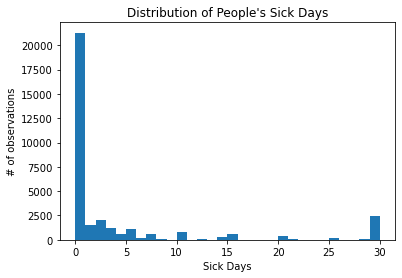

In [15]:
# graphic showing the histogram of data
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(df['PHYSHLTH'], bins=30)

ax.set_xlabel('Sick Days')
ax.set_ylabel('# of observations')
ax.set_title("Distribution of People's Sick Days")

plt.show()

## 3. Generate a graphic that compares the average number of sick days for each state.

In [16]:
df.groupby('_STATE')['PHYSHLTH'].mean()

_STATE
9.0     3.688562
34.0    4.380957
36.0    4.148030
Name: PHYSHLTH, dtype: float64

In [17]:
means = df.groupby('_STATE')['PHYSHLTH'].mean().values
states = ['Conn', 'NJ', 'NY']

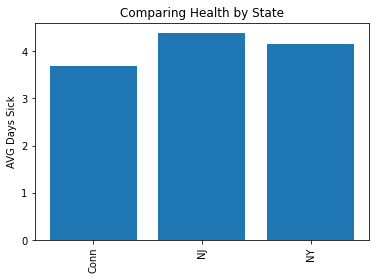

In [18]:
# code to graph those averages using matplotlib
fig, ax = plt.subplots()

# Plot a bar-chart
ax.bar(states, means)

# Set title and lables
ax.set_xticklabels(['Conn', 'NJ', 'NY'], rotation=90)
ax.set_ylabel("AVG Days Sick")
ax.set_title('Comparing Health by State')

plt.show()

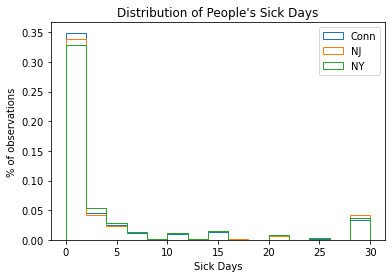

In [19]:
# graphic showing the histogram of data

fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(df[df['_STATE']==9]['PHYSHLTH'], bins=15, density=True, histtype='step', label='Conn')
ax.hist(df[df['_STATE']==34]['PHYSHLTH'], bins=15, density=True,histtype='step', label='NJ')
ax.hist(df[df['_STATE']==36]['PHYSHLTH'], bins=15, density=True,histtype='step', label='NY')

# Set labels and title
ax.set_xlabel('Sick Days')
ax.set_ylabel('% of observations')
ax.set_title("Distribution of People's Sick Days")
ax.legend()

plt.show()

## 4. Turn the number of sick days into a classification of of chronically sick people.
Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.

In [20]:
# code to create new colum for chronically sick

df['CHRONIC'] = np.where(df['PHYSHLTH']>=20, 1,0)

In [21]:
df['CHRONIC'].value_counts()

0    30534
1     3213
Name: CHRONIC, dtype: int64

In [22]:
df['CHRONIC'].value_counts().sum()

33747

In [39]:
x = df['CHRONIC'].value_counts()[0] / df['CHRONIC'].value_counts().sum()

In [40]:
y = df['CHRONIC'].value_counts()[1] / df['CHRONIC'].value_counts().sum()

In [41]:
x * y

0.08614381155252243

In [ ]:
p_hat 

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state.

In [23]:
df.groupby('_STATE')['CHRONIC'].mean()

_STATE
9.0     0.084414
34.0    0.106214
36.0    0.094055
Name: CHRONIC, dtype: float64

In [24]:
df['CHRONIC'].describe()

count    33747.000000
mean         0.095208
std          0.293507
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: CHRONIC, dtype: float64

In [25]:
chronic_means = df.groupby('_STATE')['CHRONIC'].mean().values
df.groupby('_STATE')['CHRONIC'].mean()

_STATE
9.0     0.084414
34.0    0.106214
36.0    0.094055
Name: CHRONIC, dtype: float64

## 8. Statistical Inference

## Create a 95% confidence interval for the population mean of physically ill days.

In [26]:
mu = df.CHRONIC.mean()
mu

0.09520846297448662

In [27]:
n = df.CHRONIC.value_counts()
n

0    30534
1     3213
Name: CHRONIC, dtype: int64

In [28]:
df['PHYSHLTH'].mean()

4.085340919192817

In [29]:
df['PHYSHLTH'].value_counts().sum()

33747

In [30]:
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

In [31]:
def conf_interval(sample):
    """
    Function input: population, sample
    Function output: z-critical, Margin of Error, Confidence Interval
    """

    sample_size = len(sample)
    x_hat = sample.mean()
    # Calculate the z-critical value using stats.norm.ppf()
    # Note that we use stats.norm.pff(q = 0.0975) to get the desired z-critical value
    # Instead of q = 0.95 because the distribution has two tails

    z = stats.norm.ppf(q = 0.975)

    # Calculate the population std from data
    stdev = sample.std()

    # Calculate the margin of error using formula given above
    moe = z * (stdev/math.sqrt(sample_size))


    conf = (x_hat - moe, x_hat + moe)

    return z, moe, conf

## Create a 95% confidence interval for the population mean of physically ill days.

In [32]:
z_critical, margin_of_error, confidence_interval = conf_interval(df['PHYSHLTH'])
print('z_critical')
print(z_critical)
print('margin_of_error')
print(margin_of_error)
print('confidence_interval')
print(confidence_interval)

z_critical
1.959963984540054
margin_of_error
0.090829739409602
confidence_interval
(3.9945111797832156, 4.17617065860242)


## Create a 95% confidence interval for the true proportion of chronically sick people.

In [33]:
z_critical, margin_of_error, confidence_interval = conf_interval(df['CHRONIC'])
print('z_critical')
print(z_critical)
print('margin_of_error')
print(margin_of_error)
print('confidence_interval')
print(confidence_interval)

z_critical
1.959963984540054
margin_of_error
0.0031314752376483987
confidence_interval
(0.09207698773683823, 0.09833993821213502)


## 9. Hypothesis Tests 

### 1. Hnull = 4, Halt != 4

### 2. Set some level of sig. called alpha.

alpha is the probabilty of rejecting the null hypothesis when it is true.

i.e. significance level of 0.05 indicates a 5% risk of concluding that a differnece exists when there is no actual differnece. 0.025 for two sided and 0.05 for one side. If it fails in this region we can reject the null hypothesis.

If we don't have a p value we can also establish a critical zone and see if it falls within those parameters. 

1) Find the difference between the sample mean and the null hypothesis value. (330.6 - 260 = 70.6)

2) Next we can see where it falls in comparison to the mean. At either end of the distributions (260 +/- 70.6). Here we can check what how much of the region lies to the left and right of it. In this case we have a probability of 0.01556 for a total probability of 0.03112. 

3) This probability represents the likelihood of obtaining a sample mean thata is at least as extreme as our sample mean in both tails of the distribution if the population mean is 260. That is our P value here.

4) When the p-value is less than or equal to the significance level you reject the null hypothesis. So it would be statistically significant at an alpha of 0.05 (meaning that it confirms the null hypothesis) but an alpha of 0.01 it would not be significant so we would reject it


In [ ]:
### 3. Identify the sample distribution. 



### 4. Calculate a test statistic. 

Test statistic: The sample statistic one uses to either reject Ho (and conclude Ha) or not to reject Ho. These may look like the one sample z-test, two sample z-test, one sample t-test and so forth. 

### 5. Calculate probability value (p-value), or find rejection region.

once we have the z-value or t-value we can input it into a table to find the rejection region.

### 6. Make a test decision about the null hypothesis.

When the p-value is less than or equal to the significance level you reject the null hypothesis. So it would be statistically significant at an alpha of 0.05 (meaning that it confirms the null hypothesis) but an alpha of 0.01 it would not be significant so we would reject it

### 7. State an overall conclusion.

If a probability value is greater than the right side of the established alpha or less than the left side of the established alpha. You can reject the null hypothesis.

### 9.A The following questions are regarding the `PHYSHLTH` variable. 
1. What is the probability of getting this sample mean for days physically ill, if the population mean is 4?
2. Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?
3. Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states. 

# 9.A-1.

What is the probability of getting this sample mean for days physically ill, if the population mean is 4?

In [34]:
df['PHYSHLTH'].mean()

4.085340919192817

In [35]:
#Hnull = 4, Halt != 4
alpha = 0.025
popmean = 4


In [36]:
def two_sided(sample, nullmu, alpha):


    x_bar = sample.mean()
    mu_not = nullmu
    sigma = sample.std()
    n = sample.value_counts().sum()

    z = (x_bar - mu_not)/(sigma/math.sqrt(n))

    df = len(sample) - 1

    t_crit = stats.t.ppf(1 - alpha, df=df)

    results = stats.ttest_1samp(a = sample, popmean = mu_not)

    return z

In [37]:
two_sided(df['PHYSHLTH'], 4, 0.025)

1.8415238127148346

In [38]:
df.groupby('SEX')['PHYSHLTH'].mean()

SEX
1.0    3.700972
2.0    4.385278
9.0    5.388889
Name: PHYSHLTH, dtype: float64

In [39]:
def one_sample_ttest(sample, popmean, alpha):
    # Population mean 
    mu = popmean
    # Sample mean (x̄) using NumPy mean()
    x_bar= sample.mean()
    # Sample Standard Deviation (sigma) using Numpy
    sigma = np.std(sample)
    # Degrees of freedom
    df = len(sample) - 1  
    #Calculate the critical t-value
    t_crit = stats.t.ppf(1 - alpha, df=df)
    #Calculate the t-value and p-value
    results = stats.ttest_1samp(a= sample, popmean= mu)         
    if (results[0]>t_crit) or (results[0]< (-t_crit)) or (results[1]<alpha):
        print ("We reject null hypothesis. Results are statistically significant with t-value =", 
                round(results[0], 2), "critical t-value =", t_crit, "and p-value =", np.round((results[1]), 10))
    else:
        print ("We fail to reject the null hypothesis. Results are statistically insignifcant with t-value ==", 
                round(results[0], 2), ", critical t-value =", t_crit, "and p-value =", np.round((results[1]), 10))

In [40]:
stats.ttest_1samp(df["PHYSHLTH"], 4)

Ttest_1sampResult(statistic=1.8415238127150806, pvalue=0.06555360487569364)

In [41]:
one_sample_ttest(df['PHYSHLTH'], popmean, alpha)

We fail to reject the null hypothesis. Results are statistically insignifcant with t-value == 1.84 , critical t-value = 1.9600342848681533 and p-value = 0.0655536049


In [42]:
len(df['PHYSHLTH'])

33747

# 9.A-2.
 Cleaning our male and female data in regards to PHYSHLTH

 and finding the pooled varience between the two

In [43]:
df.drop(df[df['SEX'] == 9].index, inplace = True)
df['SEX'].dropna(inplace = True)
df['SEX'] = np.where(df['SEX'] == 1, 'Male', 'Female')

In [44]:
df.shape

(33729, 359)

In [45]:
df['SEX'].value_counts()

Female    18911
Male      14818
Name: SEX, dtype: int64

In [46]:
df_male = df[df['SEX'] == 'Male']
df_female = df[df['SEX'] == 'Female']

In [52]:
df['SEX'].value_counts()

Female    18911
Male      14818
Name: SEX, dtype: int64

In [53]:
males = df[df['SEX'] == 'Male']
females = df[df['SEX'] == 'Female']

In [55]:
sample_variance(males)['PHYSHLTH']

67.73719416927912

In [72]:
#n_male = len(df_male['PHYSHLTH'])
#n_female = len(df_female['PHYSHLTH'])

In [73]:
#mean_male = df_male['PHYSHLTH'].mean()
#mean_female = df_female['PHYSHLTH'].mean()

In [74]:
sample_mean_physhlth = df['PHYSHLTH'].mean()
#phys_male = df[df['SEX'] == 'Male']['PHYSHLTH']
#phys_female = df[df['SEX'] == 'Female']['PHYSHLTH']

In [75]:
phys_female.value_counts()

0.0     11508
30.0     1434
2.0      1168
1.0       849
5.0       677
3.0       662
10.0      466
7.0       402
15.0      401
4.0       378
20.0      264
14.0      205
6.0       111
25.0       95
8.0        66
21.0       44
12.0       42
28.0       37
29.0       20
27.0       16
16.0       12
9.0         9
22.0        7
18.0        7
19.0        6
17.0        6
24.0        5
26.0        5
11.0        4
23.0        3
13.0        2
Name: PHYSHLTH, dtype: int64

In [76]:
stats.ttest_ind(phys_female, phys_male)

Ttest_indResult(statistic=7.3333586565586, pvalue=2.2949494325716564e-13)

In [47]:
def sample_variance(sample):
    sample_mean = np.mean(sample)
    return np.sum((sample - sample_mean) ** 2) / (len(sample) - 1)

In [48]:
def pooled_variance(sample1, sample2):
    n_1, n_2 = len(sample1), len(sample2)
    var_1, var_2 = sample_variance(sample1), sample_variance(sample2)
    return ((n_1 - 1) * var_1 * (n_2 - 1) * var_2) / ((n_1 + n_2) - 2) 

In [57]:
pooled_variance(df_male, df_female)['PHYSHLTH']

42740487.24957545

In [79]:
pooled_variance(phys_female, phys_male)

42740487.24957545

In [82]:
twosample_tstat(phys_female, phys_male)

0.009540723631810704

In [49]:
def twosample_tstat(experimental, control):
    experimental_mean, control_mean = np.mean(experimental), np.mean(control)
    pool_var = pooled_variance(experimental, control)
    n_experimental, n_control = len(experimental), len(control)
    num = experimental_mean - control_mean
    denom = np.sqrt(pool_var * (1/n_experimental + 1/n_control))
    return num / denom

t_stat = twosample_tstat(phys_female, phys_male)
t_stat

NameError: name 'phys_female' is not defined

# 9.A-3.

is there statistically significant difference is physical health of people from the three states

In [216]:
df.head(-200)

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,...,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,CHRON_SICK,CHRONIC
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,3.0,0.0,2.0,88.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,Female,5.0,6.0,2.0,NaN,NaN,NaN,2.0,1.0,88.0,7.0,1.0,160.0,502.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,101.0,5.0,88.0,2.0,301.0,202.0,305.0,202.0,303.0,306.0,1.0,67.0,203.0,100.0,55.0,201.0,100.0,204.0,1.0,2.0,NaN,2.0,NaN,1.0,42016.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

9.0 = Conn
34.0 = NJ
36.0 = NY

In [230]:
df.groupby('_STATE')['PHYSHLTH'].get_group(9.0).describe()

count    10398.000000
mean         3.684555
std          8.097946
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

In [220]:
df.groupby('_STATE')['PHYSHLTH'].get_group(34.0).mean()

4.380956536917438

In [221]:
df.groupby('_STATE')['PHYSHLTH'].get_group(36.0).mean()

4.149077739408742

In [232]:
df['by_state'] = df['_STATE'].apply(lambda x: 'CT' if x == 9.0 else ('NJ' if x == 34.0 else 'NY'))

<AxesSubplot:title={'center':'PHYSHLTH'}, xlabel='by_state'>

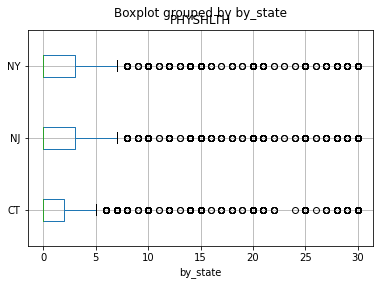

In [234]:
df.boxplot('PHYSHLTH', by = 'by_state', vert = False)

In [235]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

anova_state_act = ols('PHYSHLTH~by_state', data=df).fit()

In [239]:
anova_table_1 = sm.stats.anova_lm(anova_state_act, type=2)
print(anova_table_1)

               df        sum_sq      mean_sq          F        PR(>F)
by_state      2.0  2.719741e+03  1359.870587  18.787981  6.998831e-09
Residual  33726.0  2.441082e+06    72.379814        NaN           NaN


### 9.B The following questions are regarding the  `CHRONIC` variable.
1. What is the probability of drawing this sample proportion if chronically true population proportion is 0.10?
2. Is there a statistically significant difference in the percentage of men and women who are chronically sick?
3. Perform a statistical test to determine if there is a statistically significant difference in cproportion of people with chronic health issues from the three states.

# 9.B-1.
What is the probability of drawing this sample proportion if chronically true population proportion is 0.10?

In [244]:
tpp = 0.10
c_alpha = 0.025

In [246]:
one_sample_ttest(df['CHRONIC'], tpp, c_alpha)


We reject null hypothesis. Results are statistically significant with t-value = -3.02 critical t-value = 1.9600343223874412 and p-value = 0.0025081268


# 9.B-2

Is there a statistically significant difference in the percentage of men and women who are chronically sick?

In [251]:
df_male['PHYSHLTH'].mean()


3.700971791064921

In [61]:
df['CHRONIC'].value_counts()

0    30519
1     3210
Name: CHRONIC, dtype: int64

In [257]:
df_male['CHRONIC'].mean()
#df_female['CHRONIC'].mean()

0.08638142799298151

In [258]:
sample_mean_chronic = df['CHRONIC'].mean()
chronic_male = df[df['SEX'] == 'Male']['CHRONIC']
chronic_female = df[df['SEX'] == 'Female']['CHRONIC']

In [259]:
twosample_tstat(chronic_female, chronic_male)

0.18432475753493152

In [60]:
def pop_prob_test(sample, p_value):

    n = sample.value_counts().sum()

    p_hat = sample.vallue_counts()[1] / n
    p_not = p_value

    z_score = (p_hat - p_value) / math.sqrt((p_value * (1 - p_value)) / (n))

    p_value = (1 - stats.norm.cdf(z)) * 2

    return p_value, z, p_hat
    #if (p_value)

# 9.B-3

Perform a statistical test to determine if there is a statistically significant difference in cproportion of people with chronic health issues from the three states.

In [260]:
anova_state_chron = ols('CHRONIC~by_state', data=df).fit()

In [261]:
anova_table_2 = sm.stats.anova_lm(anova_state_chron, type=2)
print(anova_table_2)

               df       sum_sq   mean_sq          F        PR(>F)
by_state      2.0     2.652276  1.326138  15.412687  2.038976e-07
Residual  33726.0  2901.850971  0.086042        NaN           NaN


# 10.A 

Select a continuous variable from the survey questions as you dependent variable and perform the following: 

1. Determine the sample mean and sample standard deviation 

2. Create a confidence interval for a population mean. 

3. Perform a two-sample test of means for gender. 

4. Perform a one-way ANOVA using your categorical independent variable.

In [273]:
df['PA1MIN_']

49938       14.0
49939     1400.0
49941      180.0
49942      150.0
49943      360.0
           ...  
303767      70.0
303768     120.0
303769      28.0
303775      42.0
303776     120.0
Name: PA1MIN_, Length: 22047, dtype: float64

In [274]:
df.dropna(subset = ['PA1MIN_'], inplace=True)

In [275]:
df['PA1MIN_'].describe()

count    22047.000000
mean       454.995056
std        975.202986
min          0.000000
25%        120.000000
50%        260.000000
75%        520.000000
max      75540.000000
Name: PA1MIN_, dtype: float64

In [276]:
df['PA1MIN_'].value_counts()

0.0       911
120.0     838
180.0     837
420.0     761
210.0     751
         ... 
1022.0      1
1034.0      1
1736.0      1
1880.0      1
775.0       1
Name: PA1MIN_, Length: 1220, dtype: int64

In [272]:
one_sample_ttest(df['PA1MIN_'], 400, 0.025)

We reject null hypothesis. Results are statistically significant with t-value = 8.37 critical t-value = 1.9600715958647046 and p-value = 0.0


In [271]:
conf_interval(df['PA1MIN_'])

(1.959963984540054, 12.872661886084423, (442.1223941306072, 467.867717902776))

In [316]:
sample_mean_pa = df['PA1MIN_'].mean()
pa_male = df[df['SEX'] == 'Male']['PA1MIN_']
pa_female = df[df['SEX'] == 'Female']['PA1MIN_']

In [320]:
df_female.value_counts()

Series([], dtype: int64)

In [317]:
twosample_tstat(pa_male, pa_female)

7.614222383319883e-05

In [282]:
anova_state_pa = ols('PA1MIN_~by_state', data=df).fit()

In [283]:
anova_table_pa1 = sm.stats.anova_lm(anova_state_pa, type=2)
print(anova_table_pa1)

               df        sum_sq       mean_sq         F    PR(>F)
by_state      2.0  6.020891e+06  3.010446e+06  3.166111  0.042186
Residual  22044.0  2.096019e+10  9.508340e+05       NaN       NaN


# 10.B 

Select/create a binary variable from the survey questions as you dependent variable and perform the following: 

1. Create a confidence interval for a population proportion. 

2. Perform a two proportions z-test using gender. 

3. Perform a Chi-Square test using your categorical independent variable.

In [301]:
df.drop(df[df['_PAINDX1'] == 9].index, inplace = True)

In [302]:
df.groupby('_PAINDX1')['_STATE'].value_counts()

_PAINDX1  _STATE
1.0       36.0      5193
          34.0      5124
          9.0       5064
2.0       36.0      2204
          34.0      1993
          9.0       1919
Name: _STATE, dtype: int64

In [305]:
df['_PAINDX1'].value_counts()

1.0    15381
2.0     6116
Name: _PAINDX1, dtype: int64

In [304]:
conf_interval(df['_PAINDX1'])

(1.959963984540054,
 0.006031390287435357,
 (1.2784734243378613, 1.290536204912732))

In [306]:
df['_PAINDX1'].describe()

count    21497.000000
mean         1.284505
std          0.451189
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: _PAINDX1, dtype: float64

In [307]:
sample_mean_pa2 = df['_PAINDX1'].mean()
pa2_male = df[df['SEX'] == 'Male']['_PAINDX1']
pa2_female = df[df['SEX'] == 'Female']['_PAINDX1']

In [309]:
twosample_tstat(pa2_female, pa2_male)

0.04004616880728029

In [85]:
df.groupby(['PA1MIN_', 'SEX'])['SEX'].head()

49938     2.0
49939     1.0
49941     2.0
49942     2.0
49943     2.0
         ... 
303694    2.0
303701    1.0
303725    1.0
303746    2.0
303764    1.0
Name: SEX, Length: 5098, dtype: float64